In [1]:
from numpy import *
import pylab as p
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [2]:
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True

True

In [3]:
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

In [4]:
A_f0 = d2X_dt2(X_f0)                    # >>> array([[ 1. , -0. ],
                                        #            [ 0. , -1.5]])

In [5]:
#!python
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

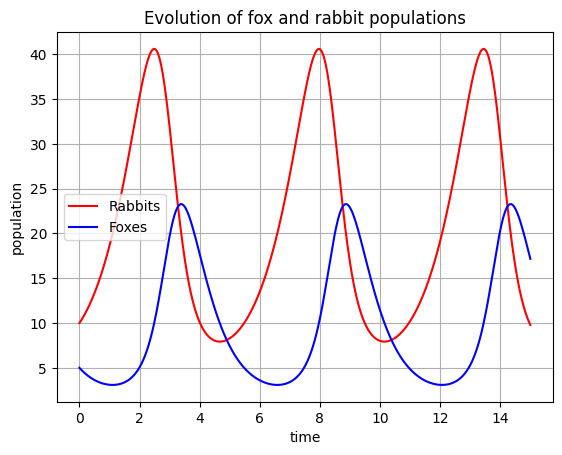

In [6]:
#!python
rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')